# Librerías necesarias

In [1]:
#!pip install -r requirements.txt
!pip install utils.py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.5 MB/s eta 0:00:00
  Created wheel for utils.py: filename=utils_py-0.3.0-py3-none-any.whl size=12317 sha256=430eb0f904e26a695f799bab7cd21f9b8c07f6cba285927f35d2dbf23d110b9b
  Stored in directory: /root/.cache/pip/wheels/f0/4e/fd/f9383f23373cb6b6a7ead2accfbf2a4ec11cc223679a8c20f7
Successfully built utils.py


In [2]:
!pip install unzip
!unzip corpusCine.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: corpusCine/1050.xml     
  inflating: __MACOSX/corpusCine/._1050.xml  
  inflating: corpusCine/3874.xml     
  inflating: __MACOSX/corpusCine/._3874.xml  
  inflating: corpusCine/1905.xml     
  inflating: __MACOSX/corpusCine/._1905.xml  
  inflating: corpusCine/249.xml      
  inflating: __MACOSX/corpusCine/._249.xml  
  inflating: corpusCine/3860.xml     
  inflating: __MACOSX/corpusCine/._3860.xml  
  inflating: corpusCine/3690.xml     
  inflating: __MACOSX/corpusCine/._3690.xml  
  inflating: corpusCine/3848.xml     
  inflating: __MACOSX/corpusCine/._3848.xml  
  inflating: corpusCine/1087.xml     
  inflating: __MACOSX/corpusCine/._1087.xml  
  inflating: corpusCine/513.xml      
  inflating: __MACOSX/corpusCine/._513.xml  
  inflating: corpusCine/1939.xml     
  inflating: __MACOSX/corpusCine/._1939.xml  
  inflating: corpusCine/275.xml      
  inflating: __MACOSX/corpusCine/._275.xml  
  inflating: corpu

In [ ]:
!pip install utils

In [3]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

import sklearn

sklearn.__version__

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 38.0 MB/s eta 0:00:00


'1.7.2'

In [4]:

!pip install pandas


!pip install numpy

from utils import load_cinema_reviews

import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

import matplotlib.pyplot as plt

# Carga de datos

In [5]:
# Path al directorio donde tenemos los datasets con las reviews
# ¡Descomprimir antes!
datasets_path = './'
corpus_cine_folder = 'corpusCine'

In [6]:

reviews_dict = load_cinema_reviews(datasets_path, corpus_cine_folder)

In [7]:
reviews_dict.get(10)

{'author': 'Javier Moreno',
 'title': 'Harry poter y el caliz de fuego',
 'sentiment': '4',
 'summary': 'Interesante adaptación de la novela de Rowling',
 'review_text': 'No. Esta vez no voy a usar una película como pretexto para exponer mis ideas o pensamientos mas dementes/racionales/insensatos. Esta vez, y lo juro ante el sagrado Necronomicón de Lovecraft, pienso hablar de la película en si (por primera vez y esperando que no sirva de precedente), aunque creo que es evidente que prefiero que una película me haga reflexionar sobre cualquier aspecto que en ella se de cita. Quizas algún dia hable sobre todo lo que significa la saga de novelas de Rowling (anda que no tengo cosas de las que hablar) desde una perspectiva menos mitológica y mas profunda.Parto de la base de que soy un autentico fan de los libros, los adoro, me parecen de lo mejorcito que ha salido en fantasia, con un personaje principal realmente interesante y atormentado a todos los niveles por todo lo que su no-existencia

In [8]:
reviews_text = []
reviews_sentiment = []

for review in reviews_dict.values():
    reviews_text.append(review.get('review_text'))
    reviews_sentiment.append(review.get('sentiment'))

df = pd.DataFrame({
    'review': reviews_text,
    'sentiment': reviews_sentiment
})
df.dropna(subset=['review', 'sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,review,sentiment
0,Cada vez me gusta menos el cine de masas. Las ...,1
1,"El otro dia fui a ver ""la de los sioux"" como d...",3
2,"Es que no la cagan en ninguna, todas las pelis...",5
3,Es un dolor esto del cine. Yo ya voy con miedo...,2
4,"Tras una insufrible primera media hora, la cas...",2


In [10]:
def label_sentiment(row):
    if int(row['sentiment']) < 3:
        return 1
    else:
        return 0

In [11]:
df['sentiment_label'] = df.apply(lambda row: label_sentiment(row), axis=1)

In [12]:
df.head()

,review,sentiment,sentiment_label
0,Cada vez me gusta menos el cine de masas. Las ...,1,1
1,"El otro dia fui a ver ""la de los sioux"" como d...",3,0
2,"Es que no la cagan en ninguna, todas las pelis...",5,0
3,Es un dolor esto del cine. Yo ya voy con miedo...,2,1
4,"Tras una insufrible primera media hora, la cas...",2,1


# Separamos en conjunto de train y test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'],
    df['sentiment_label'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [14]:
X_train.iloc[:10]

,review
1924,"Zhang Yimou ya no es el poeta de lo íntimo, el..."
3250,Las aventuras amorosas del joven Molire es el ...
1620,El cientifismo naturalista es un género cinema...
907,Quizá esperaba una crítica más demoledora del ...
1864,Colateral de Michael Mann desnuda con claridad...
3007,No es Gracia Querejeta una directora a la que ...
1583,Esta es una de esas extrañas películas que emp...
370,Suele ocurrir que cuando alguien pone las expe...
2045,"Vivian vive en Bucarest, trabaja en una tienda..."
3601,Algunos filmes pasan a ser de culto por un hec...


In [15]:
y_train.iloc[:10]

,sentiment_label
1924,0
3250,0
1620,1
907,1
1864,0
3007,0
1583,0
370,0
2045,1
3601,1


# Extracción de features

In [16]:
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 1)
)
cv.fit(X_train)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,'ascii'
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [17]:
print(list(cv.vocabulary_.items())[:20])

[('ya', np.int64(2492)), ('lo', np.int64(1351)), ('director', np.int64(684)), ('alla', np.int64(103)), ('primeros', np.int64(1848)), ('ahora', np.int64(84)), ('visual', np.int64(2459)), ('maestro', np.int64(1380)), ('cuyo', np.int64(561)), ('talento', np.int64(2248)), ('consiste', np.int64(457)), ('belleza', np.int64(235)), ('ejercicio', np.int64(750)), ('bajo', np.int64(215)), ('forma', np.int64(976)), ('entender', np.int64(784)), ('cine', np.int64(368)), ('acostumbrados', np.int64(49)), ('esta', np.int64(854)), ('al', np.int64(87))]


In [18]:
print(len(cv.vocabulary_))

2500


## TF-IDF scores del training set y test set

In [19]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

## Score IDF de algunas palabras

In [20]:
words_example = [
    'cine',
    'pelicula',
    'muy',
    'y',
    'de',
    'que',
    'potter',
    'mala',
    'aburrimiento',
    'sorprendente',
    'aburrir',
    'ausdf'
]

In [21]:
vocab_idf = dict(zip(cv.get_feature_names_out(), cv.idf_))

print('{0:20}{1:20}'.format('Palabra', 'IDF'))
for word in words_example:
    if word not in vocab_idf:
        print('{0:20}{1:20}'.format(word, 'OOV'))
    else:
        print('{0:20}{1:2.3f}'.format(word, vocab_idf[word]))

Palabra             IDF                 
cine                1.556
pelicula            1.154
muy                 1.532
y                   OOV                 
de                  OOV                 
que                 OOV                 
potter              5.005
mala                3.155
aburrimiento        4.727
sorprendente        4.275
aburrir             OOV                 
ausdf               OOV                 


## Palabras con el TF-IDF en alguna review

In [22]:
i = random.randint(0, len(X_train))
print('ID: {}'.format(i))
print('Sentiment: {}'.format(y_train.iloc[i]))
print('Review: {}'.format(X_train.iloc[i]))

ID: 179
Sentiment: 0
Review: Dirigida por el aclamado Kim Jee-Won. Basada en un conocido cuento popular coreano (Janghwa y Hongryeon, Rosa y Loto rojo, llevada en numerosas ocasiones a la gran pantalla), narra la historia de la tormentosa relación entre dos hermanas muy unidas y su madrastra, con la figura de un padre ausente, perdido, dolido.por detrás de la interpretación de lo que constituye el triángulo central de la trama, las dos hermanas y la madrastra. Las hermanas Su-Mi (Im-Soo Yung) y Su-Yeon (Moon Geun Young) llegan al hogar familiar después de una larga convalecencia en el hospital. En la casa se encuentran con su padre, un hombre taciturno y preocupado, y su madrastra Eun-Joo, una mujer que constantemente cambia de carácter, y que parece guardar una especie de odio y rencor hacia las dos hermanas. Su-Yeon es la que sufre, sobre todo, las consecuencias de los ataques de ira de Eun-Joo, al ser mas débil debido a un hecho traumático que presenció cuando su madre se quitó la v

In [23]:
doc_vector = X_train_[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[:top_n]))
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[-top_n:]))

Top 10 words with highest TF_IDF in the review 179:
           tfidf
su      0.295003
padre   0.184319
casa    0.163769
mi      0.155943
trama   0.155560
debido  0.153982
haber   0.145284
dos     0.143804
partes  0.136110
muy     0.117141

Top 10 words with lowest TF_IDF in the review 179:
           tfidf
vez     0.035746
entre   0.035590
solo    0.034080
hace    0.033993
hay     0.033695
aunque  0.033388
tiene   0.031920
ser     0.030050
pero    0.022344
del     0.020406


## $\chi²$ scores

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-540277736.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$', fontsize=26)
/tmp/ipython-input-540277736.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)


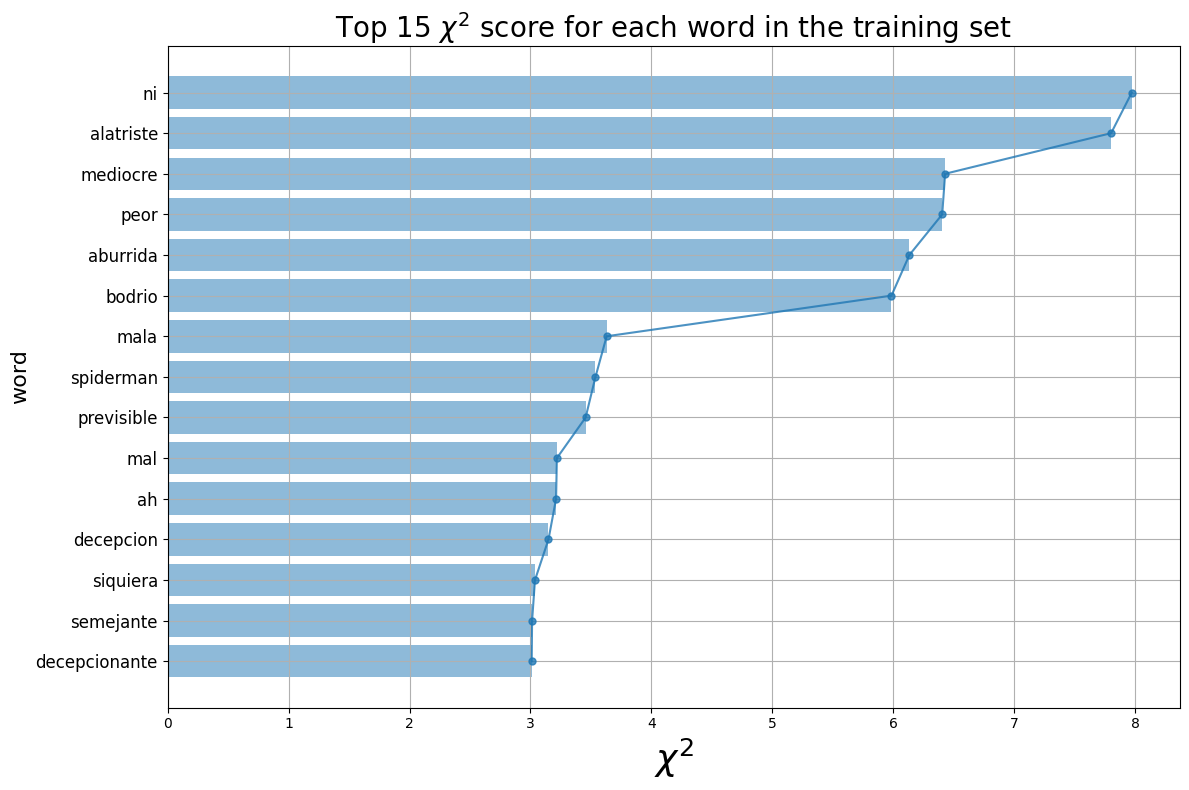

In [24]:
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_, y_train)[0]
scores = list(zip(cv.get_feature_names_out(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

# Entrenamiento

In [25]:
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)

    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)

    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.6597938144329897
Accuracy for C=0.05: 0.6597938144329897
Accuracy for C=0.25: 0.6876288659793814
Accuracy for C=0.5: 0.7412371134020619
Accuracy for C=1: 0.7639175257731958
Accuracy for C=10: 0.7989690721649485
Accuracy for C=100: 0.7824742268041237
Accuracy for C=1000: 0.788659793814433
Accuracy for C=10000: 0.7855670103092783


# Algunas métricas

In [26]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[557  83]
 [125 205]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       640
           1       0.71      0.62      0.66       330

    accuracy                           0.79       970
   macro avg       0.76      0.75      0.75       970
weighted avg       0.78      0.79      0.78       970

Accuracy score:0.7855670103092783


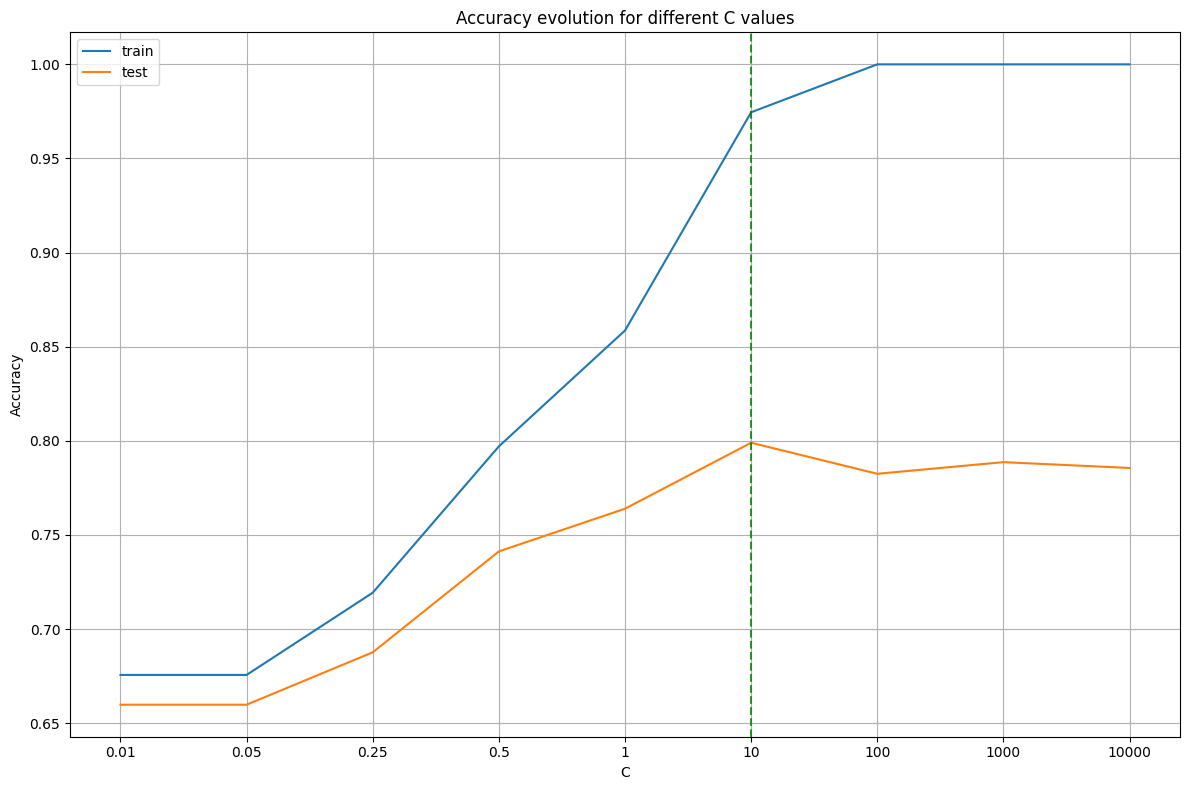

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [28]:
p, r, thresholds = precision_recall_curve(y_test, test_predict)

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

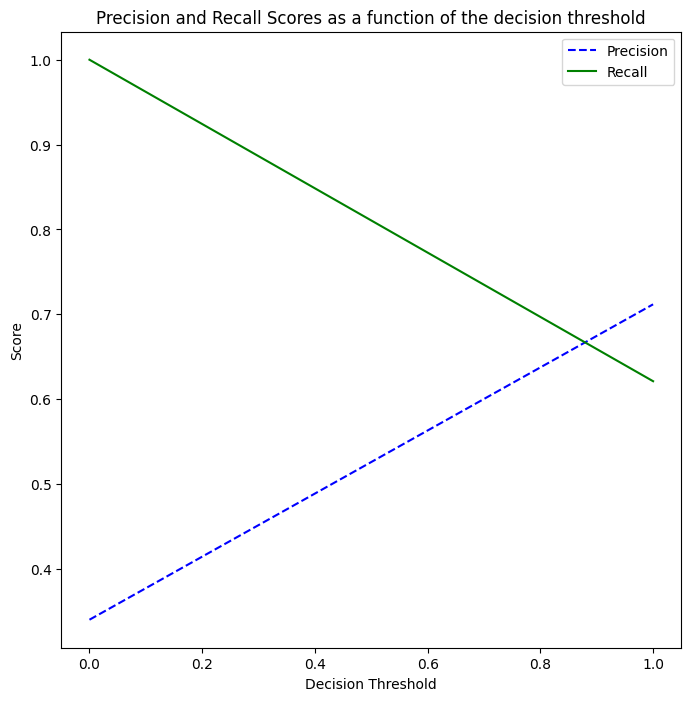

In [30]:
plot_precision_recall_vs_threshold(p, r, thresholds)

# Predict

In [31]:
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['sentiment_label']))
    r = df.iloc[review_index]['review']
    print('Prediction: {}'.format(lr.predict(cv.transform([r]))))

In [32]:


for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 618
Actual sentiment: 0
Prediction: [0]

Review no. 3510
Actual sentiment: 0
Prediction: [0]

Review no. 347
Actual sentiment: 0
Prediction: [0]

Review no. 32
Actual sentiment: 0
Prediction: [0]

Review no. 2642
Actual sentiment: 1
Prediction: [1]
